<h2>Importando as bibliotecas</h2>


In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h2> Carregando os datasets

In [118]:
df_test = pd.read_csv('Datasets/test.csv')
df_train = pd.read_csv('Datasets/train.csv') 

<h2>Hipóteses</h2>

Hipóteses são suposições fundamentadas sobre padrões e relacionamentos nos dados que podem influenciar maa variável. Elas são essenciais para direcionar a análise exploratória de forma estruturada, gerar insights sobre o comportamento dos dados, identificar variáveis mais relevantes para o modelo e validar descobertas. 


---

**Hipótese 1:** A quantidade de exemplos para cada classe da variável alvo pode ser desproporcional.

**Resultados:** 
- 418 Positivos (64,71%)
- 228 Negativos (35,29%)

**Conclusão:**
A hipótese é verdadeira. O numero de resultados positivos é consideravelmente maior em relação aos negativos

labels
1    418
0    228
Name: count, dtype: int64
Proporção:
0: 35.29%
1: 64.71%


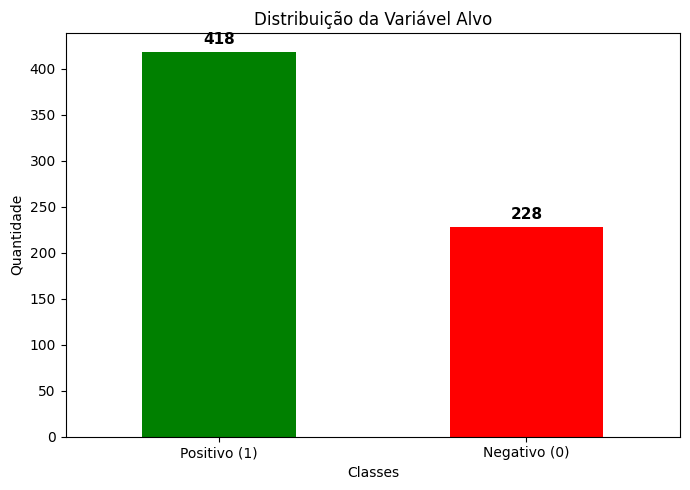

In [119]:
target_counts = df_train['labels'].value_counts()
print(target_counts)
print("Proporção:")
print(f"0: {target_counts[0]/len(df_train)*100:.2f}%")
print(f"1: {target_counts[1]/len(df_train)*100:.2f}%")

# Plota o gráfico
fig, (ax1) = plt.subplots(1, figsize=(7, 5))

# Adicionando o título e as labels
bars = target_counts.plot(kind='bar', ax=ax1, color=['green', 'red'])
ax1.set_title('Distribuição da Variável Alvo')
ax1.set_xlabel('Classes')
ax1.set_ylabel('Quantidade')
ax1.set_xticklabels(['Positivo (1)','Negativo (0)'], rotation=0)

# Adicionando os valores nas barras
for i, v in enumerate(target_counts.values):
    ax1.text(i, v + 5, str(v), ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

**Hipótese 2:** Empresas localizadas na Califórnia (is_CA) têm maior probabilidade de sucesso do que empresas de outros estados.

**Resultados:** 
- Califórnia: 69,12% de sucesso
- Outros estados: 59,39% de sucesso

**Conclusão:** A hipótese é verdadeira. Empresas da Califórnia têm aproximadamente 10% mais chances de sucesso.


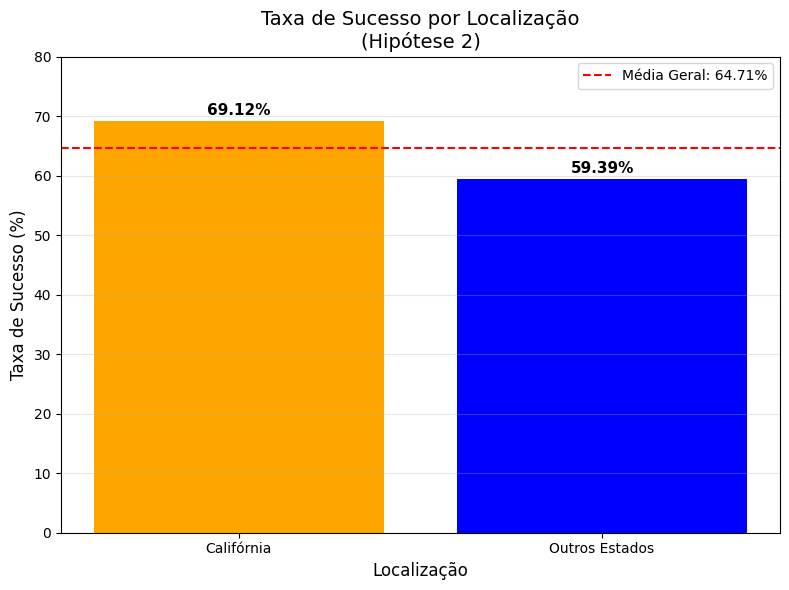

In [120]:
# Calculo das taxas de sucesso
ca_success_rate = df_train[df_train['is_CA']==1]['labels'].mean() * 100
others_success_rate = df_train[df_train['is_CA']==0]['labels'].mean() * 100

# Cria variáveis para o gráfico
locations = ['Califórnia', 'Outros Estados']
success_rates = [ca_success_rate, others_success_rate]

# Plota o gráfico
plt.figure(figsize=(8, 6))
bars = plt.bar(locations, success_rates, color=['orange', 'blue'])

# Adicionando o título e as labels
plt.title('Taxa de Sucesso por Localização\n(Hipótese 2)', fontsize=14)
plt.ylabel('Taxa de Sucesso (%)', fontsize=12)
plt.xlabel('Localização', fontsize=12)
plt.ylim(0, 80)

# Adiciona os valores nas barras
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1, f'{height:.2f}%', ha='center', fontweight='bold', fontsize=11)

# Calcula a media de outros estados e traça a linha a representando
overall_success = df_train['labels'].mean() * 100
plt.axhline(y=overall_success, color='red', linestyle='--', label=f'Média Geral: {overall_success:.2f}%')

plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

**Hipótese 3:** Empresas que receberam investimento de Venture Capital têm maior taxa de sucesso comparadas às que não receberam.

**Resultados:** 
- Com VC: 61,03% de sucesso
- Sem VC: 66,51% de sucesso

**Conclusão:** A hipótese é falsa. Surpreendentemente, empresas sem VC têm ligeiramente maior taxa de sucesso.


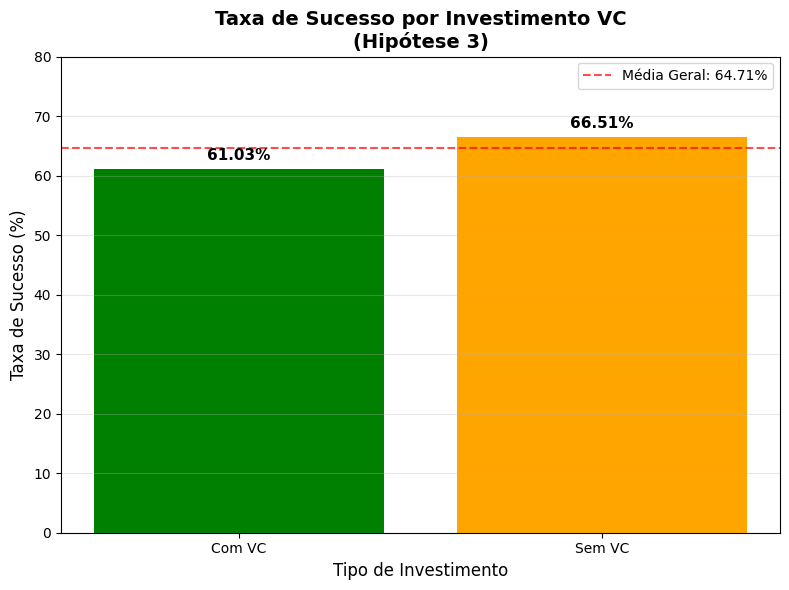

In [121]:
# Calculo das taxas de sucesso
vc_success_rate = df_train[df_train['has_VC']==1]['labels'].mean() * 100
no_vc_success_rate = df_train[df_train['has_VC']==0]['labels'].mean() * 100

# Cria variáveis para o gráfico
vc_categories = ['Com VC', 'Sem VC']
success_rates = [vc_success_rate, no_vc_success_rate]

# Plota o gráfico
plt.figure(figsize=(8, 6))
bars = plt.bar(vc_categories, success_rates, color=['green', 'orange'])

# Adicionando o título e as labels
plt.title('Taxa de Sucesso por Investimento VC\n(Hipótese 3)', fontsize=14, fontweight='bold')
plt.ylabel('Taxa de Sucesso (%)', fontsize=12)
plt.xlabel('Tipo de Investimento', fontsize=12)
plt.ylim(0, 80)

# Adiciona os valores nas barras
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1, 
             f'{height:.2f}%', ha='center', va='bottom', fontweight='bold', fontsize=11)

# Calcula a media de sucesso das empresas e traça a linha a representando
overall_success = df_train['labels'].mean() * 100
plt.axhline(y=overall_success, color='red', linestyle='--', alpha=0.7, label=f'Média Geral: {overall_success:.2f}%')

plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

<h2>Pré Processamento de dados</h2>

Esta célula executa etapas cruciais de pré-processamento nos conjuntos de dados de treino e teste, preparando-os para o treinamento. As principais tarefas incluem a codificação de variáveis categóricas, a separação de informações não relevantes para o treino e o alinhamento da estrutura dos dataframes, garantindo que ambos tenham uma estrutura limpa e consistente.

In [122]:
categorical_cols = df_train.select_dtypes(include=['object']).columns #identifica colunas categoricas

#aplica one-hot encoding
df_train_processed = pd.get_dummies(df_train, columns=categorical_cols) 
df_test_processed = pd.get_dummies(df_test, columns=categorical_cols)

#armazena informações que não são relevantes para treino do modelo
train_labels = df_train_processed['labels']
train_ids = df_train_processed['id']
tests_ids = df_test_processed['id']

#remove colunas que não devem ser utilizadas durante o treino
df_train_processed = df_train_processed.drop(columns=['labels', 'id']) #remove coluna alvo do conjunto de treino
df_test_processed = df_test_processed.drop(columns=['id'])

# Calcula a mediana das colunas numéricas do conjunto de treino
medians = df_train_processed.median()

# Preenche valores nulos com a mediana correspondente de cada coluna
df_train_processed = df_train_processed.fillna(medians) 
df_test_processed = df_test_processed.fillna(medians)

#armazena as colunas de cada dataframe
train_cols = df_train_processed.columns
test_cols = df_test_processed.columns

#identifica todas as colunas que não estão presentes em "test_cols" e as adiciona preenchendo todos os valores com 0 
missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    df_test_processed[c] = 0

#garante que a ordem das colunas do teste esteja igual a do treino
df_test_processed = df_test_processed[train_cols]

<h2>Criação dos Conjuntos para Treinamento e Validação</h2>

Nesta etapa, o conjunto de dados é estrategicamente dividido em duas amostras principais: uma para treinamento e outra para validação. Essa separação é fundamental para avaliar de forma honesta a performance do modelo em dados que ele não viu durante o seu treinamento.
 

In [123]:
from sklearn.model_selection import train_test_split

X = df_train_processed #features
y = train_labels #target

#divide 20% dos dados para validação, "stratify=y" garante que a proporção de sucessos e fracassos seja igual em ambos os conjuntos
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) 

<h2>Treinamento e Avaliação do Modelo</h2> 

Nesta célula, o modelo de RandomForestClassifier é criado e treinado com os dados preparados anteriormente. A configuração do modelo inclui hiperparâmetros, como o uso de 500 árvores (n_estimators=500) e regras para evitar o overfitting, garantindo a reprodutibilidade dos resultados com random_state=42.

Após o treinamento com os dados de treino (X_train, y_train), o modelo é avaliado no conjunto de validação (X_val, y_val) para medir seu desempenho em dados desconhecidos. O desempenho é medido por metricas como: Accuracy, precision, recall e f1_score

In [124]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, classification_report

rf_model = RandomForestClassifier(n_estimators=500, random_state=42, min_samples_split=5, min_samples_leaf=5)  #define os hiperparâmetros do modelo
rf_model.fit(X_train, y_train) #treina o modelo
rf_preds = rf_model.predict(X_val) #faz previsões no conjunto de validação

#avalia o desempenho do modelo
print(f"Accuracy: {accuracy_score(y_val, rf_preds):.4f}")
print(classification_report(y_val, rf_preds))

Accuracy: 0.7692
              precision    recall  f1-score   support

           0       0.74      0.54      0.62        46
           1       0.78      0.89      0.83        84

    accuracy                           0.77       130
   macro avg       0.76      0.72      0.73       130
weighted avg       0.76      0.77      0.76       130



<h2>Treinamento Final</h2>

Nesta fase, diferente da anterior, o modelo é treinado com todo o conjunto de dados para maximizar seu desempenho antes de realizar as previsões no conjunto de teste. Em seguida, é gerado um novo arquivo CSV chamado "results.csv", que estrutura os resultados em duas colunas: id, labels.

In [125]:
#treina o modelo final 
final_model = RandomForestClassifier(n_estimators=500, random_state=42, min_samples_split=5, min_samples_leaf=5)
final_model.fit(X, y) 

test_predictions = final_model.predict(df_test_processed)

In [126]:
#salva uma variavel com o id e a respectiva previsão
results_df = pd.DataFrame({
    'id': tests_ids, 
    'labels': test_predictions
})
#salva o arquivo csv
results_df.to_csv('results.csv', index=False)
